Thi is a script for the plot of the significance of different signals given different backgrounds.

This is done using the equation proposed by Li and Ma


@article{li1983analysis,

  title={Analysis methods for results in gamma-ray astronomy},

  author={Li, T-P and Ma, Y-Q},

  journal={Astrophysical Journal, Part 1 (ISSN 0004-637X), vol. 272, Sept. 1, 1983, p. 317-324.},

  volume={272},

  pages={317--324},

  year={1983}

}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from utils.utils_functions import (
    calculate_significance,
)

In [6]:
def plot_significance(
    source,
    bg,
    significance,
):
    plt.rcParams.update({"font.size": 14})
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    plt.rcParams.update({"font.size": 14})
    # Define the colors for each step
    colors = [
        "grey",
        "violet",
        "green",
        "orange",
        "indigo",
        "lime",
        "yellow",
        "blue",
        "aqua",
        "red",
        "cornsilk",
    ]
    # Create a colormap with the specified colors
    cmap = ListedColormap(colors)

    pcm = ax.pcolormesh(
        source,
        bg,
        significance,
        cmap=cmap,
        vmax=len(colors),
    )
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Source")
    ax.set_ylabel("Background")
    ax.set_title("Significance as a function of source and background")
    fig.colorbar(
        pcm,
        shrink=0.8,
        # aspect=2,
        label="Significance",
        ticks=range(0, len(colors) + 1),
    )
    ax.grid(True, which="both", linestyle="-", color="k", alpha=0.5)
    plt.show()

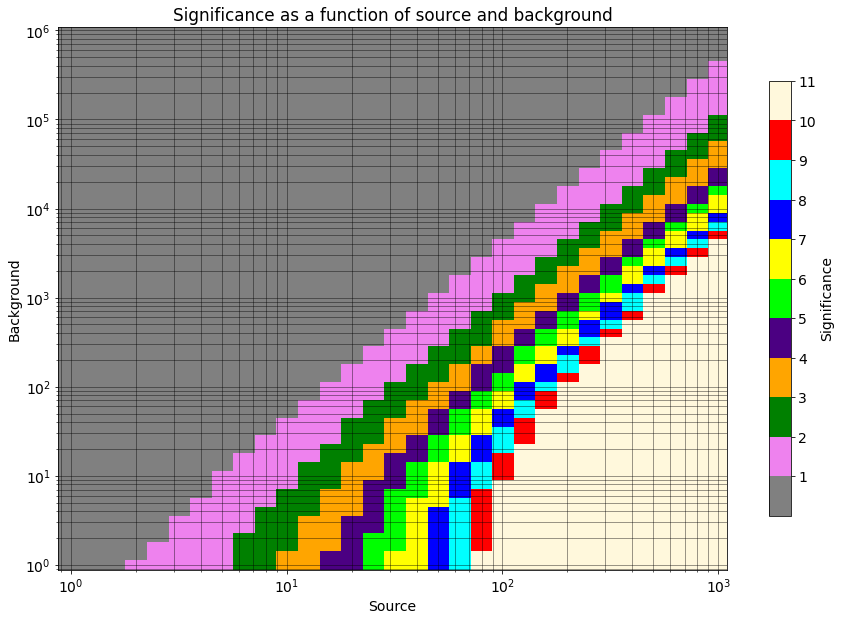

In [7]:
source = np.logspace(0, 3, 31)
bg = np.logspace(0, 6, 61)

source, bg = np.meshgrid(source, bg)
significance = calculate_significance(source + bg, bg, 1)

plot_significance(source, bg, significance)